=== 서비스업 시계열 분석 ===
서비스업 로그 변환 후 1차 차분 ADF Statistic: -8.152116549231968
서비스업 로그 변환 후 1차 차분 p-value: 9.633588194652571e-13


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\1899413435.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row_pvalue], ignore_index=True)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be u

서비스업 다음 4분기 예측: 2024-03-31    7.083645e+12
2024-06-30    7.200771e+12
2024-09-30    7.354278e+12
2024-12-31    7.491845e+12
Freq: QE-DEC, Name: predicted_mean, dtype: float64




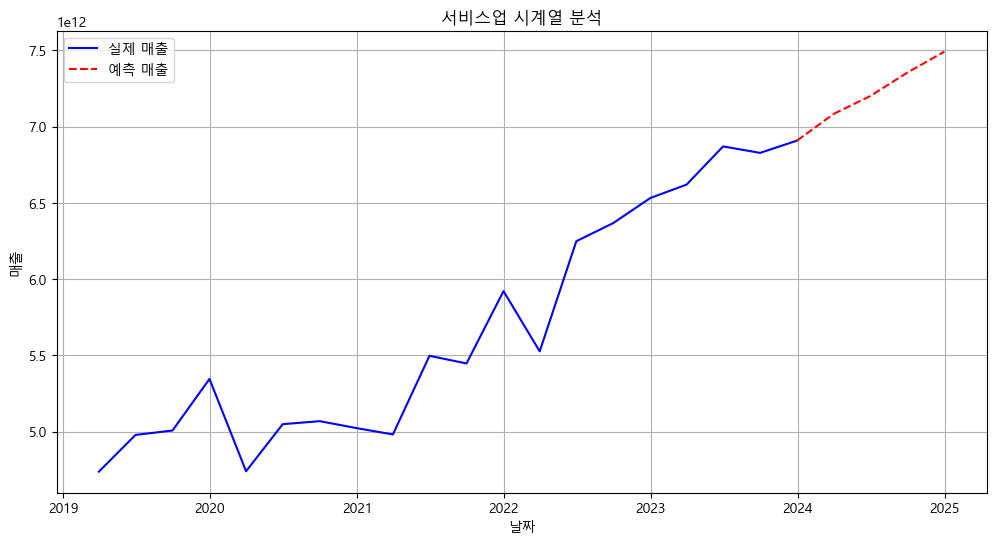

=== 요식업 시계열 분석 ===
요식업 로그 변환 후 1차 차분 ADF Statistic: -4.05906098152481
요식업 로그 변환 후 1차 차분 p-value: 0.0011309452712970531
요식업 다음 4분기 예측: 2024-03-31    9.793340e+12
2024-06-30    1.011224e+13
2024-09-30    1.027896e+13
2024-12-31    1.059139e+13
Freq: QE-DEC, Name: predicted_mean, dtype: float64




C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\1899413435.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row_pvalue], ignore_index=True)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be u

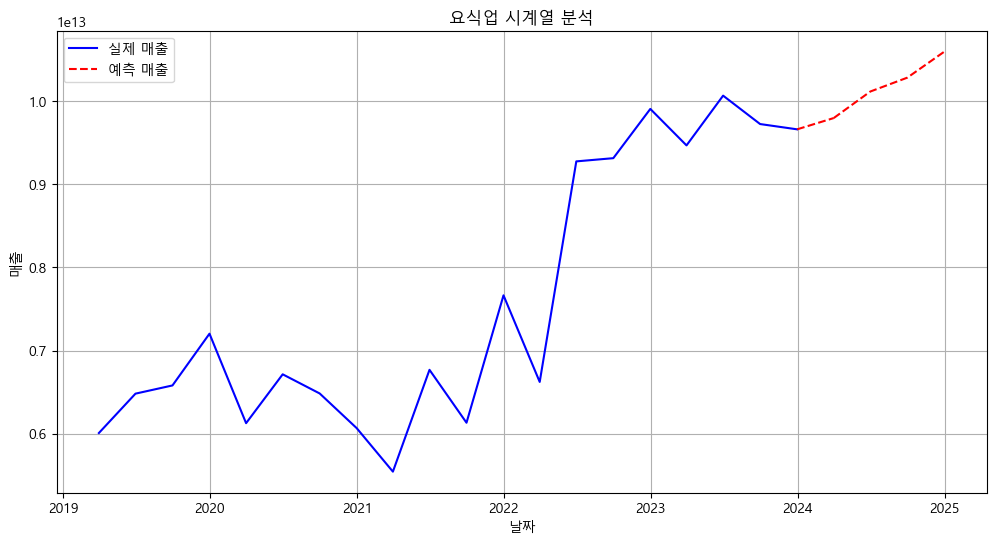

=== 판매업 시계열 분석 ===
판매업 로그 변환 후 1차 차분 ADF Statistic: -5.001459889913815
판매업 로그 변환 후 1차 차분 p-value: 2.204598105693094e-05
판매업 다음 4분기 예측: 2024-03-31    1.716285e+13
2024-06-30    1.736263e+13
2024-09-30    1.759351e+13
2024-12-31    1.782607e+13
Freq: QE-DEC, Name: predicted_mean, dtype: float64




C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\1899413435.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row_pvalue], ignore_index=True)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be u

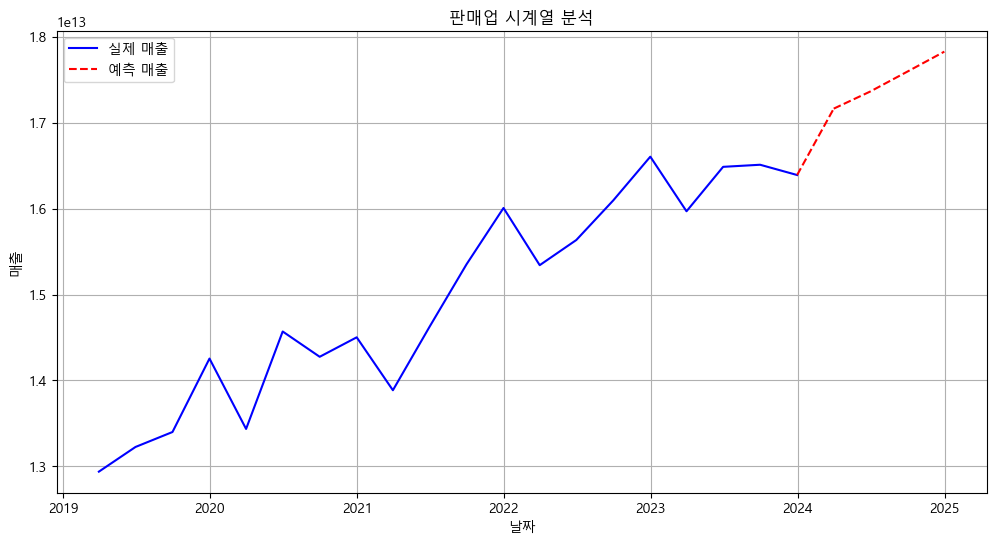

예측 결과가 ./data_csv/forecast_results.csv에 저장되었습니다.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

plt.rc('font', family = 'Malgun Gothic')
# CSV 파일 로드
data = pd.read_csv("./data_csv/transformed_all_year_job.csv")

# 날짜 열을 datetime 타입으로 변환 후 인덱스로 설정
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)

# 업종 목록
upjong_columns = data.columns

# 최종 결과를 저장할 데이터프레임 초기화
result_df = pd.DataFrame(columns=['분류'] + upjong_columns.tolist())

# 업종별 시계열 분석 및 예측
for upjong in upjong_columns:
    print(f"=== {upjong} 시계열 분석 ===")
    
    # 해당 업종 데이터 선택
    data_upjong = data[upjong]
    
    # 로그 변환
    data_upjong_log = np.log(data_upjong)
    
    # 1차 차분 수행 (로그 변환 후)
    data_upjong_log_diff = data_upjong_log.diff().dropna()
    
    # 차분 후 ADF 검정
    adf_result_diff = adfuller(data_upjong_log_diff)
    print(f'{upjong} 로그 변환 후 1차 차분 ADF Statistic:', adf_result_diff[0])
    print(f'{upjong} 로그 변환 후 1차 차분 p-value:', adf_result_diff[1])
    
    # p-value 저장
    new_row_pvalue = pd.DataFrame({'분류': ['p-value'], upjong: [adf_result_diff[1]]})
    result_df = pd.concat([result_df, new_row_pvalue], ignore_index=True)
    
    # ARIMA 모델 적합
    model = ARIMA(data_upjong_log_diff, order=(1, 0, 1))
    model_fit = model.fit()
    
    # 예측을 원래 수준으로 복원
    forecast_diff = model_fit.forecast(steps=4)
    forecast_log = data_upjong_log.iloc[-1] + forecast_diff.cumsum()
    forecast = np.exp(forecast_log)  # 로그 변환을 되돌림
    
    # 예측 결과 저장
    for i, value in enumerate(forecast):
        new_row = pd.DataFrame({'분류': [f'2024년도 {i+1}분기'], upjong: [value]})
        result_df = pd.concat([result_df, new_row], ignore_index=True)
    
    print(f'{upjong} 다음 4분기 예측:', forecast)
    print("\n")
    
    # 기존 데이터와 예측 데이터를 함께 시각화
    plt.figure(figsize=(12, 6))
    
    # 2023년도 4분기까지의 데이터 (파란색)
    plt.plot(data[upjong], color='blue', label=f'실제 매출')
    
    # 2024년도 이후 예측 데이터 (빨간색)
    forecast_index = pd.date_range(start=data.index[-1], periods=5, freq='Q')[1:]
    plt.plot(forecast_index, forecast, color='red', linestyle='--', label=f'예측 매출')
    
    # 2023년도 4분기와 2024년도 1분기를 빨간색 점선으로 연결
    plt.plot([data.index[-1], forecast_index[0]], [data[upjong].iloc[-1], forecast[0]], color='red', linestyle='--')
    
    plt.title(f'{upjong} 시계열 분석')
    plt.xlabel('날짜')
    plt.ylabel('매출')
    plt.legend()
    plt.grid()
    plt.show()

# CSV 파일로 저장
output_file = "./data_csv/forecast_results.csv"
result_df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"예측 결과가 {output_file}에 저장되었습니다.")





=== 서비스업 시계열 분석 ===
서비스업 로그 변환 후 1차 차분 ADF Statistic: -8.152116549231968
서비스업 로그 변환 후 1차 차분 p-value: 9.633588194652571e-13


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\2287190271.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row_pvalue], ignore_index=True)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be u

서비스업 다음 4분기 예측: 2024-03-31    7.083645e+12
2024-06-30    7.200771e+12
2024-09-30    7.354278e+12
2024-12-31    7.491845e+12
Freq: QE-DEC, Name: predicted_mean, dtype: float64




C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\2287190271.py:75: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=data.index[-1], periods=5, freq='Q')[1:]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\2287190271.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([data.index[-1], forecast_index[0]], [data[upjong].iloc[-1], forecast[0]], color='red', linestyle='--')


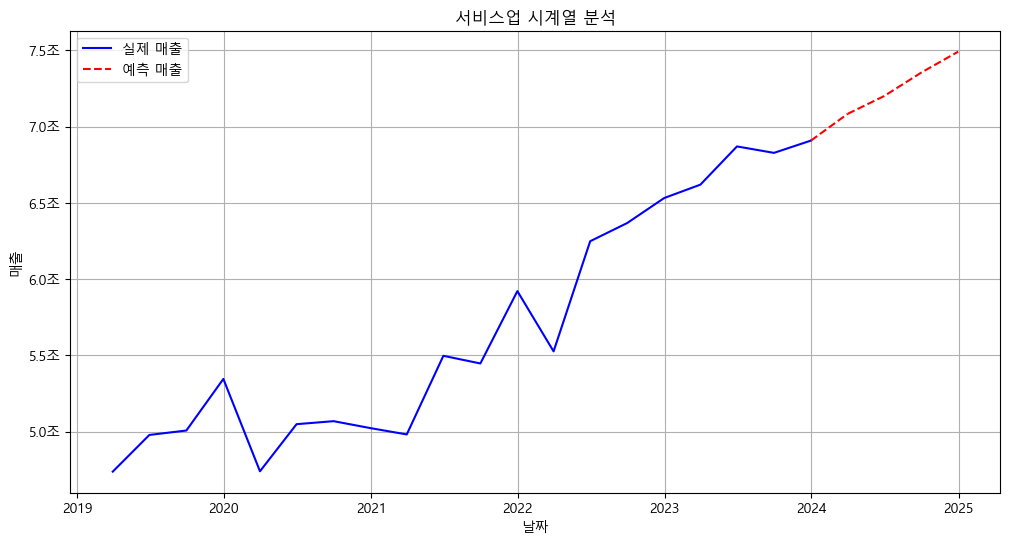

=== 요식업 시계열 분석 ===
요식업 로그 변환 후 1차 차분 ADF Statistic: -4.05906098152481
요식업 로그 변환 후 1차 차분 p-value: 0.0011309452712970531
요식업 다음 4분기 예측: 2024-03-31    9.793340e+12
2024-06-30    1.011224e+13
2024-09-30    1.027896e+13
2024-12-31    1.059139e+13
Freq: QE-DEC, Name: predicted_mean, dtype: float64




C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\2287190271.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row_pvalue], ignore_index=True)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be u

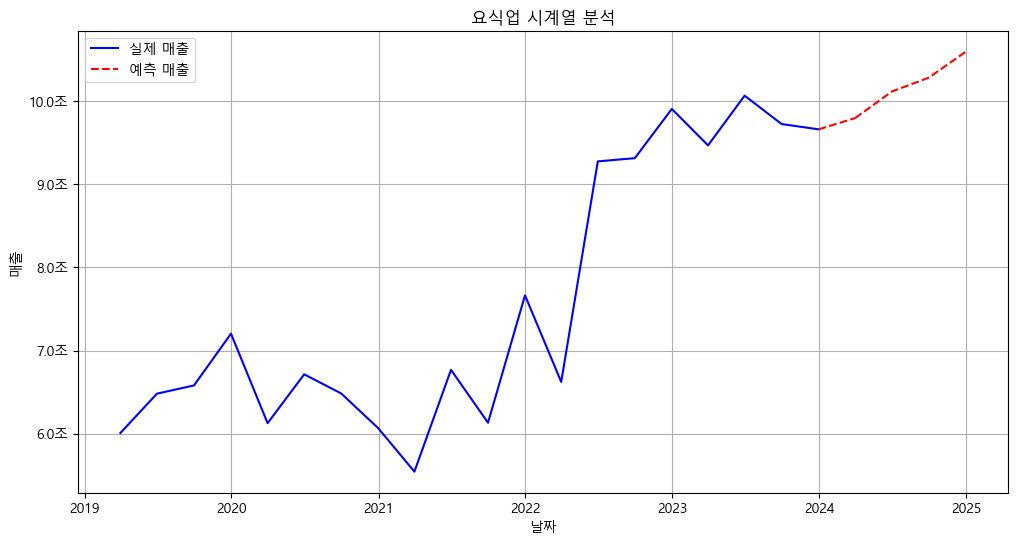

=== 판매업 시계열 분석 ===
판매업 로그 변환 후 1차 차분 ADF Statistic: -5.001459889913815
판매업 로그 변환 후 1차 차분 p-value: 2.204598105693094e-05


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\2287190271.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row_pvalue], ignore_index=True)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be u

판매업 다음 4분기 예측: 2024-03-31    1.716285e+13
2024-06-30    1.736263e+13
2024-09-30    1.759351e+13
2024-12-31    1.782607e+13
Freq: QE-DEC, Name: predicted_mean, dtype: float64




C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\2287190271.py:75: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=data.index[-1], periods=5, freq='Q')[1:]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14564\2287190271.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([data.index[-1], forecast_index[0]], [data[upjong].iloc[-1], forecast[0]], color='red', linestyle='--')


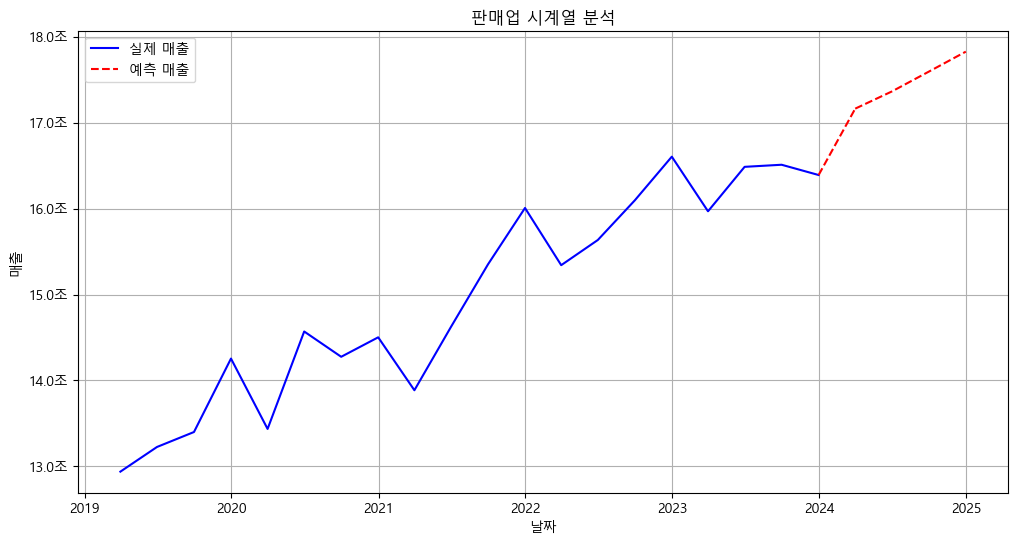

예측 결과가 ./data_csv/forecast_results.csv에 저장되었습니다.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

plt.rc('font', family='Malgun Gothic')

# CSV 파일 로드
data = pd.read_csv("./data_csv/transformed_all_year_job.csv")

# 날짜 열을 datetime 타입으로 변환 후 인덱스로 설정
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)

# 업종 목록
upjong_columns = data.columns

# 최종 결과를 저장할 데이터프레임 초기화
result_df = pd.DataFrame(columns=['분류'] + upjong_columns.tolist())

# Y축을 조 단위로 포맷하는 함수
def billions(x, pos):
    return '%1.1f조' % (x * 1e-12)

formatter = FuncFormatter(billions)

# 업종별 시계열 분석 및 예측
for upjong in upjong_columns:
    print(f"=== {upjong} 시계열 분석 ===")
    
    # 해당 업종 데이터 선택
    data_upjong = data[upjong]
    
    # 로그 변환
    data_upjong_log = np.log(data_upjong)
    
    # 1차 차분 수행 (로그 변환 후)
    data_upjong_log_diff = data_upjong_log.diff().dropna()
    
    # 차분 후 ADF 검정
    adf_result_diff = adfuller(data_upjong_log_diff)
    print(f'{upjong} 로그 변환 후 1차 차분 ADF Statistic:', adf_result_diff[0])
    print(f'{upjong} 로그 변환 후 1차 차분 p-value:', adf_result_diff[1])
    
    # p-value 저장
    new_row_pvalue = pd.DataFrame({'분류': ['p-value'], upjong: [adf_result_diff[1]]})
    result_df = pd.concat([result_df, new_row_pvalue], ignore_index=True)
    
    # ARIMA 모델 적합
    model = ARIMA(data_upjong_log_diff, order=(1, 0, 1))
    model_fit = model.fit()
    
    # 예측을 원래 수준으로 복원
    forecast_diff = model_fit.forecast(steps=4)
    forecast_log = data_upjong_log.iloc[-1] + forecast_diff.cumsum()
    forecast = np.exp(forecast_log)  # 로그 변환을 되돌림
    
    # 예측 결과 저장
    for i, value in enumerate(forecast):
        new_row = pd.DataFrame({'분류': [f'2024년도 {i+1}분기'], upjong: [value]})
        result_df = pd.concat([result_df, new_row], ignore_index=True)
    
    print(f'{upjong} 다음 4분기 예측:', forecast)
    print("\n")
    
    # 기존 데이터와 예측 데이터를 함께 시각화
    plt.figure(figsize=(12, 6))
    
    # 2023년도 4분기까지의 데이터 (파란색)
    plt.plot(data[upjong], color='blue', label=f'실제 매출')
    
    # 2024년도 이후 예측 데이터 (빨간색)
    forecast_index = pd.date_range(start=data.index[-1], periods=5, freq='Q')[1:]
    plt.plot(forecast_index, forecast, color='red', linestyle='--', label=f'예측 매출')
    
    # 2023년도 4분기와 2024년도 1분기를 빨간색 점선으로 연결
    plt.plot([data.index[-1], forecast_index[0]], [data[upjong].iloc[-1], forecast[0]], color='red', linestyle='--')
    
    plt.title(f'{upjong} 시계열 분석')
    plt.xlabel('날짜')
    plt.ylabel('매출')
    plt.gca().yaxis.set_major_formatter(formatter)  # Y축을 조 단위로 설정
    plt.legend()
    plt.grid()
    plt.savefig(f"C:/Users/박민우/sf6-data/data_csv/{upjong}_시계열_분석.jpg", dpi=300)
    plt.show()

# CSV 파일로 저장
output_file = "./data_csv/forecast_results.csv"
result_df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"예측 결과가 {output_file}에 저장되었습니다.")
